📐 1. Buat Dataset Time Series

In [34]:
import numpy as np
import tensorflow as tf

# Fungsi membuat data deret sinus dengan noise
def generate_series(n_steps, n_samples=10000):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, n_samples, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  # sin pertama
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))  # sin kedua
    series += 0.1 * (np.random.rand(n_samples, n_steps) - 0.5)      # noise
    return series[..., np.newaxis]  # shape (n_samples, n_steps, 1)

n_steps = 50
series = generate_series(n_steps + 1)

# Bagi menjadi input dan target
X = series[:, :n_steps]     # langkah 0–49
y = series[:, -1]           # langkah ke-50 (target)

# Split train/test
X_train, y_train = X[:7000], y[:7000]
X_valid, y_valid = X[7000:9000], y[7000:9000]
X_test, y_test = X[9000:], y[9000:]

🔁 2. Model dengan SimpleRNN

In [35]:
from tensorflow import keras

model_rnn = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model_rnn.compile(loss="mse", optimizer="adam")
history_rnn = model_rnn.fit(X_train, y_train, epochs=10,
                            validation_data=(X_valid, y_valid))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0564 - val_loss: 0.0051
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0048 - val_loss: 0.0039
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0031 - val_loss: 0.0031


🧠 3. Model LSTM dan GRU

In [36]:
model_lstm = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20),
    keras.layers.Dense(1)
])
model_lstm.compile(loss="mse", optimizer="adam")
model_lstm.fit(X_train, y_train, epochs=10,
               validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0680 - val_loss: 0.0241
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0172 - val_loss: 0.0068
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0059 - val_loss: 0.0034
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0029 - val_loss: 0.0028


In [37]:
model_gru = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20),
    keras.layers.Dense(1)
])
model_gru.compile(loss="mse", optimizer="adam")
model_gru.fit(X_train, y_train, epochs=10,
              validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0853 - val_loss: 0.0121
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0085 - val_loss: 0.0058
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0039 - val_loss: 0.0038


🌀 4. Alternatif: CNN 1D untuk Time Series

In [38]:
model_cnn = keras.models.Sequential([
    keras.layers.Conv1D(32, kernel_size=5, strides=1, padding="causal",
                        activation="relu", input_shape=[None, 1]),
    keras.layers.Conv1D(32, kernel_size=5, strides=1, padding="causal", activation="relu"),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(1)
])

model_cnn.compile(loss="mse", optimizer="adam")
model_cnn.fit(X_train, y_train, epochs=10,
              validation_data=(X_valid, y_valid))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1269 - val_loss: 0.0904
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0916 - val_loss: 0.0919
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0839 - val_loss: 0.0753
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0716 - val_loss: 0.0612
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0600 - val_loss: 0.0476
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0504 - val_loss: 0.0510
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0437 - val_loss: 0.0536
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0420 - val_loss: 0.0368
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0365 - val_loss: 0.0362
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0366 - val_loss: 0.0324


📊 5. Evaluasi dan Prediksi

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


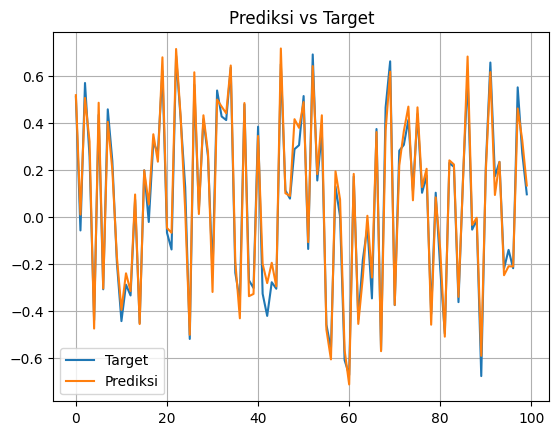

In [39]:
# Pilih model (misalnya model_rnn atau model_lstm)
model = model_lstm

y_pred = model.predict(X_test)
import matplotlib.pyplot as plt

plt.plot(y_test[:100], label="Target")
plt.plot(y_pred[:100], label="Prediksi")
plt.legend()
plt.title("Prediksi vs Target")
plt.grid(True)
plt.show()

## ✅ Catatan:

* Semua model di atas bisa dipakai untuk data deret waktu, input shape: `[batch_size, time_steps, features]`.
* **SimpleRNN** cocok untuk eksperimen kecil, tapi mudah mengalami vanishing gradient.
* **LSTM** dan **GRU** jauh lebih stabil untuk sekuens panjang.
* **Conv1D** berguna sebagai alternatif cepat, meski tidak menangkap long-term dependency dengan baik.
